In [1]:
from datasets import ImageDataSets
from skimage import io
import os
from os.path import join
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

# Creating a simple Dataloader from our dataset and displaying the results

In [2]:
root_dir = 'data'
ImageDataset = ImageDataSets(root_dir)

In [3]:
dataloader = DataLoader(ImageDataset, batch_size=1, shuffle=True)

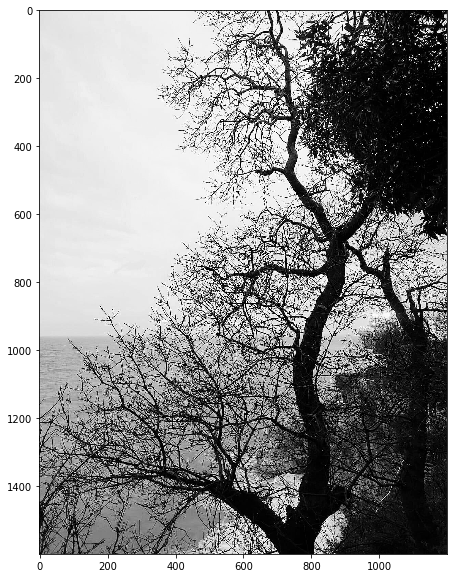

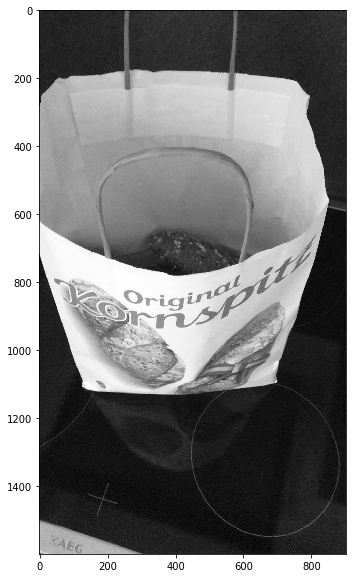

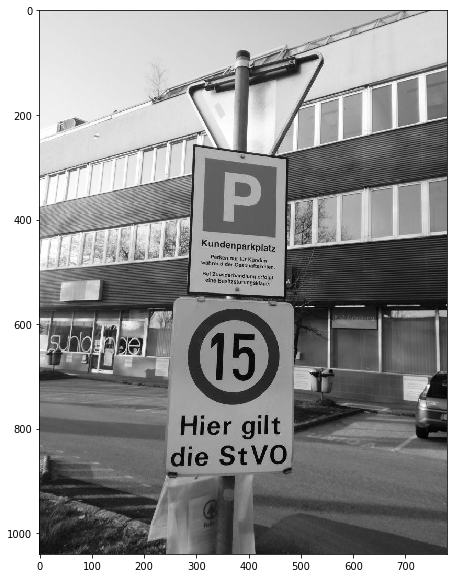

In [4]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 4:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 7:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
    if i_batch == 42:
        plt.figure(figsize=(10,10))
        plt.imshow(np.squeeze(sample_batched.numpy()), cmap= 'Greys_r')
        break